In [166]:
#imports
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None 

In [167]:
# importing graphs
hospital_df = pd.read_csv("hosp_data.csv")
crime_df = pd.read_csv("crime_data.csv")
city_pop_df = pd.read_excel('city_pop.xlsx')

In [168]:
# Enum for converting state abrv to full name
# https://gist.github.com/rogerallen/1583593

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
us_state_list = list (us_state_to_abbrev.values())

 # Operation Find Top-Rated Hospitals (OFTRH)

 ### Abstract

Finding quality healthcare is important. The goal of this project is to provide patients with listings of top- rated hospitals near them, so they are provided with timely and quality care. With this information, another goal of this project is to attempt to explain reasoning for the such hospital ratings by comparing crime rates in the same areas. We hypothesize areas with higher crime rates will have lower funded hospitals and will therefore have lower hospital ratings and areas with lower crime rates will have better funded hospitals and therefore higher quality hospital ratings. To accomplish this, we will use the Hospital General Information data set available at this [site](https://data.cms.gov/provider-data/topics/hospitals) and extract the hospital ratings data for each state. The data provides key information on hospitals in the US including their name, state, rating and type of hospital ownership (government, proprietary, voluntary (non-profit), etc.). To determine the correlation(s) between hospital ratings and crime rates we will use the crime rate dataset from this [site](https://worldpopulationreview.com/state-rankings/crime-rate-by-state).

### Significance of Data Analysis

The analysis of this data will allow individuals to find the top-rated hospital in their state. With this information individuals can find comfort in knowing that the hospital they select to recieve care from is going to supply them with top-rated care, and it will allow them to avoid low-rating hospitals in their state.

<h3>How the overall hospital rating is decided.</h3>
<p>This rating summarizes a variety of measures across 5 areas of quality into a single star rating for each hospital.</p>
<p>The 5 measure groups and their weight used in calculation are as follows:
    <ul>
        <li>Mortality: 22%</li>
        <li>Safety: 22%</li>
        <li>Readmission: 22%</li>
        <li>Patient Experience: 22%</li>
        <li>Timely & Effective Care: 12%</li>
    </ul>
</p>

| Overall Rating | Percentage of Hospitals |
| :-------- | :------- |
| 1 star | 6.34% |
| 2 star | 22.49% |
| 3 star | 28.68% |
| 4 star | 28.68% |
| 5 star | 13.81% |

### What does "crime rate" mean?
It indicates the amount of crime per 100,000 people.

### Project Literature
- Areas that have lower crime rates have less deaths by crimes, which means lower mortality rates at hospitals which in turn give hospitals higher ratings.
- Areas with higher crime rates equates to more individuals from crimes being treated in hopsitals which in turn can make patients not feel as safe or not have as good of an experience which gives hospitals lower ratings.
- Areas with higher rates of crime have to spend more money on situations pertaining to violence and therefore have less funds to put elsewhere that may make the rating of the hospital higher.
- crime is higher in less financially equipped areas, less financially equipped areas have less funding for hospitals which results in lower overall hospital ratings

 ### Hypothesis
    
We hypothesize areas with higher crime rates will have lower funded hospitals and will therefore have lower hospital ratings and areas with lower crime rates will have better funded hospitals and therefore higher quality hospital ratings.

 ### Process
 
 We will have to extract the hospital data organized by state then find correlations between the organized data and the crime rates by state. 
 

In [169]:
# Takes in state input as abbr (WI, IL, etc)
def getOverallRatingsByStateAbbr(state_abbr):
    stateHospitals = hospital_df[hospital_df["State"] == state_abbr]
    # Drop `Not Available` then replace them with the mean of the dataset without `Not Available`
    cleanedHospitalRating = stateHospitals["Hospital overall rating"].replace("Not Available", np.nan).dropna().astype("int64")
    return stateHospitals["Hospital overall rating"].replace("Not Available", cleanedHospitalRating.mean()).astype("int64")

def getOverallRatingsByCity(city):
    try:
        cityHospitals = hospital_df[hospital_df["City"] == city]
        cleanedHospitalRating = cityHospitals["Hospital overall rating"].replace("Not Available", np.nan).dropna().astype("int64")
        return cityHospitals["Hospital overall rating"].replace("Not Available", cleanedHospitalRating.mean()).astype("int64")
    except:
        return "dont include this city, can't be converted"

def getOverallRatingsByHospitalOwnership(hospital_ownership):
    hospital_ownership = hospital_df[hospital_df["Hospital Ownership"] == hospital_ownership]
    # Drop `Not Available` then replace them with the mean of the dataset without `Not Available`
    cleanedHospitalRating = hospital_ownership["Hospital overall rating"].replace("Not Available", np.nan).dropna().astype("int64")
    return hospital_ownership["Hospital overall rating"].replace("Not Available", cleanedHospitalRating.mean()).astype("int64")

# Get all hospitals by the state
def getHospitalsByStateAbbr(state_abbr):
    return hospital_df[hospital_df["State"] == state_abbr]

# Get all of the crime rates by state
def getCrimeRateByStateAbbr(state_abbr):
    return crime_df[crime_df["state"] == abbrev_to_us_state[state_abbr]]

# Get the top rated hospital by state
def getTopRatedHospitalByStateAbbr(state_abbr):
    hospitals = getHospitalsByStateAbbr(state_abbr)
    hospitals.loc[:,"Hospital overall rating"] = hospitals["Hospital overall rating"].replace("Not Available", "0").astype("int64")
    sorted = hospitals.sort_values(by=["Hospital overall rating"], ascending=False)
    
    return sorted.iloc[0], sorted.iloc[2], sorted.iloc[3], sorted.iloc[4], sorted.iloc[5], sorted.iloc[6], sorted.iloc[7], sorted.iloc[8], sorted.iloc[9]

# Get total number of hospitals by state
def getNumberOfHospitalsByStateAbbr(state_abbr):
    return len(getHospitalsByStateAbbr(state_abbr))

# Get population by city from "April 1st, 2020"
def getPopulationByCity(city):
    try:
        return city_pop_df.loc[city_pop_df['Geographic Area'].str.lower().str.contains(city.lower())]["April 1st, 2020"].values[0]
    except:
        return f"Not Found: {city}"

ownerships = {}
# Type of hospital ownership by ratings
for ind in hospital_df.index:
    if hospital_df["Hospital Ownership"][ind] in ownerships:
        ownerships[hospital_df["Hospital Ownership"][ind]] = ownerships[hospital_df["Hospital Ownership"][ind]] + 1
    else:
        ownerships[hospital_df["Hospital Ownership"][ind]] = 1


# {'Government - Hospital District or Authority': 524,
#  'Proprietary': 1057,
#  'Voluntary non-profit - Private': 2254,
#  'Government - State': 204, 
#  'Voluntary non-profit - Other': 380,
#  'Government - Local': 424,
#  'Voluntary non-profit - Church': 299,
#  'Government - Federal': 46,
#  'Tribal': 10, 
#  'Physician': 74}

del ownerships['Department of Defense']

def get_swap_dict(d):
    return {v: k for k, v in d.items()}

# swap keys and values of the dictionary 
s_ownerships = get_swap_dict(ownerships)

### Get Top-Rated Hospitals In Your State

In [170]:
# make the out put longer (so it can display top ten hospitals)
getTopRatedHospitalByStateAbbr('WI')

(Facility ID                                                                                     520070
 Facility Name                                            MAYO CLINIC HEALTH SYSTEM EAU CLAIRE HOSPITAL
 Address                                                                                1221 WHIPPLE ST
 City                                                                                        EAU CLAIRE
 State                                                                                               WI
 ZIP Code                                                                                         54703
 County Name                                                                                 EAU CLAIRE
 Phone Number                                                                            (715) 838-3311
 Hospital Type                                                                     Acute Care Hospitals
 Hospital Ownership                                             

In [171]:
getOverallRatingsByStateAbbr('IL').mean()

3.163157894736842

In [172]:
getOverallRatingsByCity('MADISON').mean()

4.090909090909091

In [173]:
getCrimeRateByStateAbbr("IL")['rate'].sum()

3544.667

In [174]:
getOverallRatingsByHospitalOwnership('Voluntary non-profit - Church').mean()

3.3545150501672243

### Finding correlation between crime rate and hospital ratings
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).

If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. Low degree: When the value lies below + . 29, then it is said to be a small correlation.

In [175]:
# get all state hospital ratings (mean) and crime rates (combined) and create a dataframe

states = []
hospital_ratings = []
crime_rates = []

for state in us_state_list:
    # add state to states array
    states.append(state)
    # add hospital rating to hospital_ratings array
    hospital_ratings.append(getOverallRatingsByStateAbbr(state).mean())
    # add crime rate to crime rates array
    crime_rates.append(getCrimeRateByStateAbbr(state)['rate'].sum())
    
combined_df = pd.DataFrame({ "states": states, "hospital_ratings": hospital_ratings, "crime_rates": crime_rates })
#print(combined_df)

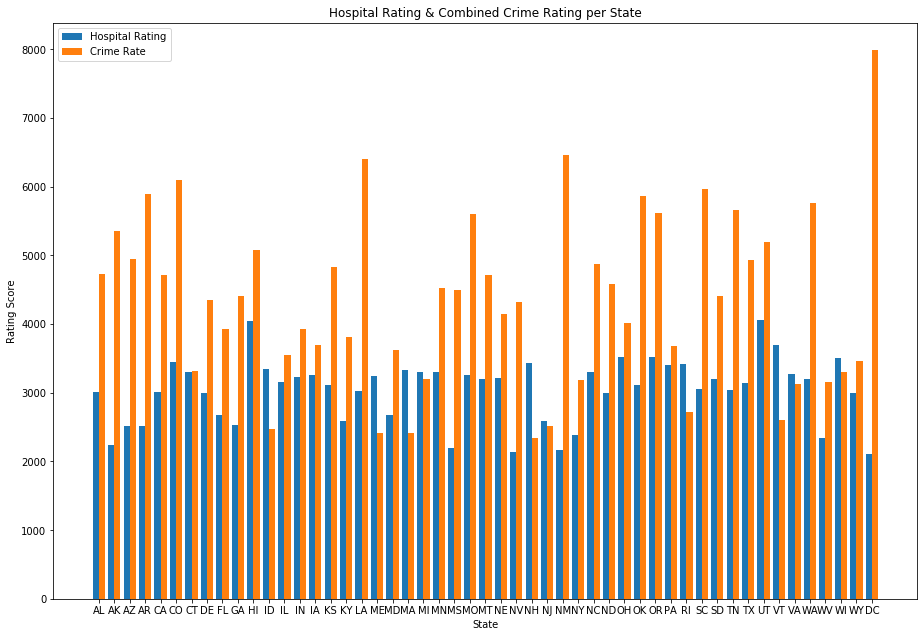

In [176]:
# Make bargraph
X_axis = np.arange(len(combined_df.states))
fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2])
ax.bar(X_axis -0.2, combined_df['hospital_ratings'].values*1000, 0.4, label="Hospital Rating")
ax.bar(X_axis +0.2, combined_df['crime_rates'].values, 0.4, label="Crime Rate")
plt.xticks(X_axis, combined_df['states'].values)
plt.xlabel("State")
plt.ylabel("Rating Score")
plt.title("Hospital Rating & Combined Crime Rating per State")
plt.legend()
plt.show()

### Results from Analysis For Combined Crime Rate (Includes Violent and Non Violent Crime Rates)
States that support the hypothesis:
- District of Columbia (DC)
- New Mexico (NM)
- Mississippi (MS)
- Georgia (GA)
- Arkansas (AR)
- Arizona (AZ)
- Alaska (AK)

A low hospital rating was defined as being below the mean and a high crime rate was defined as being above the mean. Both of these aspects needed to be true to support our hypothesis.

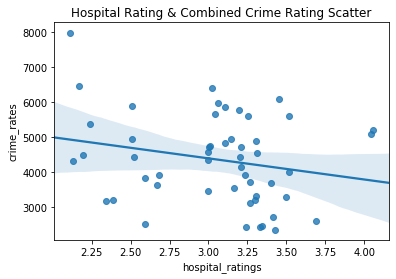

In [177]:
#Cooler Scatterplot
plt.xlabel('Hospital Rating')
plt.ylabel('Crime Rate')
plt.title("Hospital Rating & Combined Crime Rating Scatter")
plt.show(sns.regplot(x='hospital_ratings', y='crime_rates', data = combined_df))

In [178]:
# correlation (combined)
corr = combined_df["hospital_ratings"].corr(combined_df["crime_rates"])
print (round(corr, 2))
print ("small correlation")

-0.22
small correlation


In [179]:
# get all state hospital ratings (mean) and (non violent) crime rates and create a dataframe

nv_states = []
nv_hospital_ratings = []
nv_crime_rates = []

for state in us_state_list:
    # add state to states array
    nv_states.append(state)
    # add hospital rating to hospital_ratings array
    nv_hospital_ratings.append(getOverallRatingsByStateAbbr(state).mean())
    # add crime rate to crime rates array
    nv_crime_rates.append(getCrimeRateByStateAbbr(state)['nonViolentRate'].sum())
    
nv_df = pd.DataFrame({ "states": nv_states, "hospital_ratings": nv_hospital_ratings, "crime_rates": nv_crime_rates })
#print(nv_df)

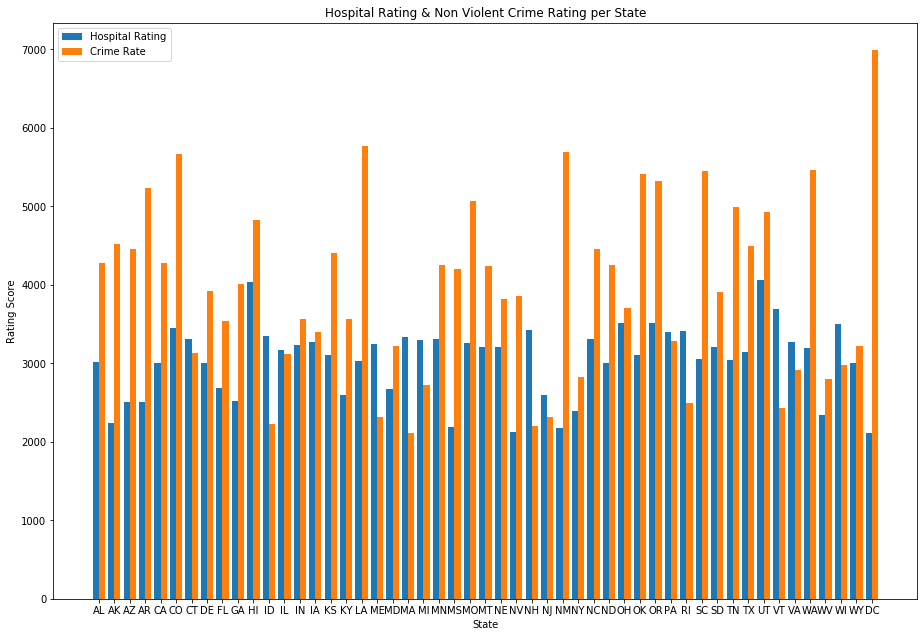

In [180]:
# Make bargraph for non violent crime rates
X_axis = np.arange(len(nv_df.states))
fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2])
ax.bar(X_axis -0.2, nv_df['hospital_ratings'].values*1000, 0.4, label="Hospital Rating")
ax.bar(X_axis +0.2, nv_df['crime_rates'].values, 0.4, label="Crime Rate")
plt.xticks(X_axis, nv_df['states'].values)
plt.xlabel("State")
plt.ylabel("Rating Score")
plt.title("Hospital Rating & Non Violent Crime Rating per State")
plt.legend()
plt.show()

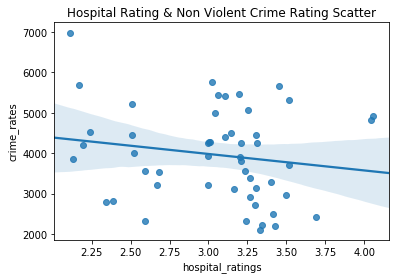

In [181]:
# Non violent scatterplot
plt.xlabel('Hospital Rating')
plt.ylabel('Crime Rate')
plt.title("Hospital Rating & Non Violent Crime Rating Scatter")
plt.show(sns.regplot(x='hospital_ratings', y='crime_rates', data = nv_df))

In [182]:
# correlation (non violent)
corr = nv_df["hospital_ratings"].corr(nv_df["crime_rates"])
print (round(corr, 2))
print ("small correlation")

-0.17
small correlation


### Results from Analysis - Non Violent (TO BE CHANGED)
States that support the hypothesis:
- District of Columbia (DC)
- New Mexico (NM)
- Mississippi (MS)
- Georgia (GA)
- Arkansas (AR)
- Arizona (AZ)
- Alaska (AK)

A low hospital rating was defined as being below the mean and a high crime rate was defined as being above the mean. Both of these aspects needed to be true to support our hypothesis.

In [183]:
# get all state hospital ratings (mean) and (violent) crime rates and create a dataframe

v_states = []
v_hospital_ratings = []
v_crime_rates = []

for state in us_state_list:
    # add state to states array
    v_states.append(state)
    # add hospital rating to hospital_ratings array
    v_hospital_ratings.append(getOverallRatingsByStateAbbr(state).mean())
    # add crime rate to crime rates array
    v_crime_rates.append(getCrimeRateByStateAbbr(state)['violentRate'].sum())
    #print (state)
    
v_df = pd.DataFrame({ "states": v_states, "hospital_ratings": v_hospital_ratings, "crime_rates": v_crime_rates })
#print(v_df)

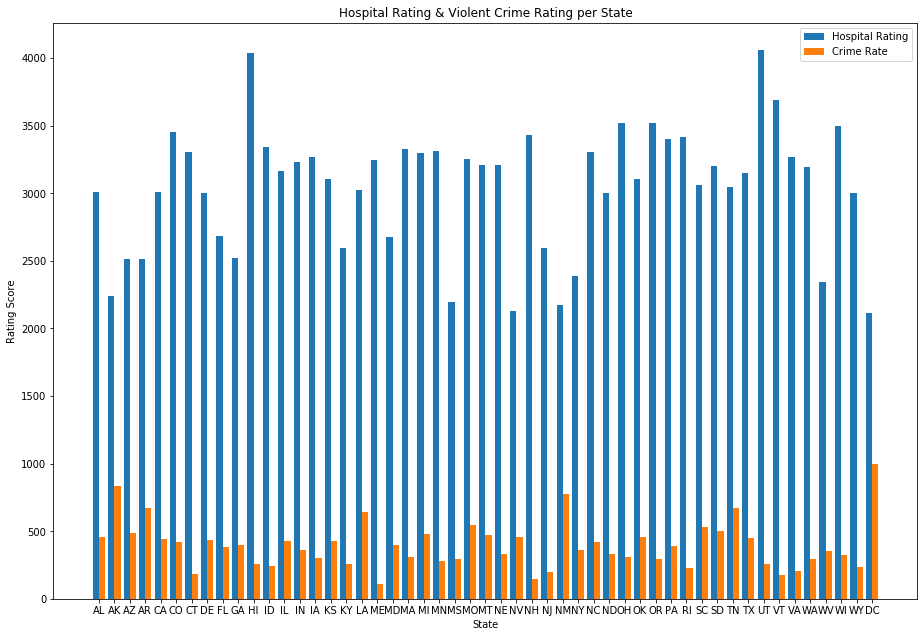

In [184]:
# Make bargraph violent
X_axis = np.arange(len(v_df.states))
fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2])
ax.bar(X_axis -0.2, v_df['hospital_ratings'].values*1000, 0.4, label="Hospital Rating")
ax.bar(X_axis +0.2, v_df['crime_rates'].values, 0.4, label="Crime Rate")
plt.xticks(X_axis, v_df['states'].values)
plt.xlabel("State")
plt.ylabel("Rating Score")
plt.title("Hospital Rating & Violent Crime Rating per State")
plt.legend()
plt.show()

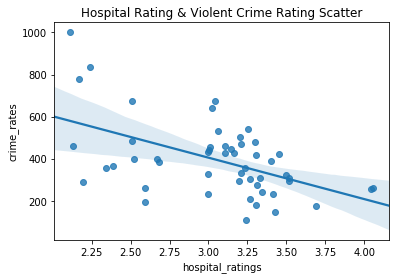

In [185]:
# Violent scatterplot
plt.xlabel('Hospital Rating')
plt.ylabel('Crime Rate')
plt.title("Hospital Rating & Violent Crime Rating Scatter")
plt.show(sns.regplot(x='hospital_ratings', y='crime_rates', data = v_df))

In [186]:
# correlation 
corr = v_df["hospital_ratings"].corr(v_df["crime_rates"])
print (round(corr, 2))
print ("strong correlation")

-0.52
strong correlation


### Results from Analysis - Violent Rates (TO BE CHANGED)
States that support the hypothesis:
- District of Columbia (DC)
- New Mexico (NM)
- Mississippi (MS)
- Georgia (GA)
- Arkansas (AR)
- Arizona (AZ)
- Alaska (AK)

A low hospital rating was defined as being below the mean and a high crime rate was defined as being above the mean. Both of these aspects needed to be true to support our hypothesis.

### What Hospital Ownerships (Source of Fundings) Have Highest Hospital Ratings

In [187]:
# convert ownerships dictionary to a list (to iterate)
ownerships_list = list (s_ownerships.values())

ownership_type = []
overall_mean_rating = []

# get mean hospital ratings per ownership type
for o_type in ownerships_list:
    # get and add ownership type to ownership type array
    ownership_type.append(o_type)
    # get and add overall rating to overall_mean_rating array
    overall_mean_rating.append(getOverallRatingsByHospitalOwnership(o_type).mean())
    

# create the ownership type dataframe
ownership_type_ratings_df = pd.DataFrame({ "ownership type": ownership_type, "overall mean rating": overall_mean_rating})
#print(ownership_type_ratings_df)

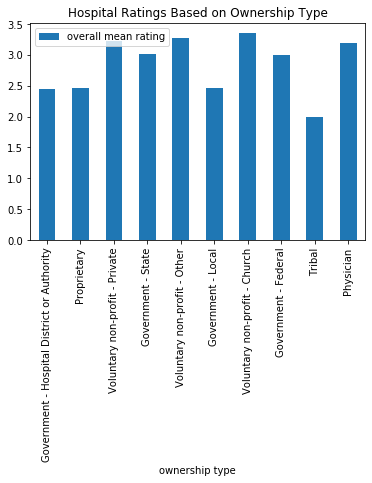

In [188]:
# make bar chart to show results visually
ownership_type_ratings_df.plot.bar(x="ownership type", y="overall mean rating", rot=90, title="Hospital Ratings Based on Ownership Type");

plt.show();


In [189]:
# why is this not sorting correctly??? I want the dataframe to sort by overall mean rating (highest ratings first)
ownership_type_ratings_df.sort_values(by="overall mean rating", ascending=False)
print(ownership_type_ratings_df)

                                ownership type  overall mean rating
0  Government - Hospital District or Authority             2.454198
1                                  Proprietary             2.459792
2               Voluntary non-profit - Private             3.231145
3                           Government - State             3.009804
4                 Voluntary non-profit - Other             3.278947
5                           Government - Local             2.466981
6                Voluntary non-profit - Church             3.354515
7                         Government - Federal             3.000000
8                                       Tribal             2.000000
9                                    Physician             3.189189


### Results from Analysis: What Hospital Ownerships (Source of Fundings) Have Highest Hospital Ratings?
Voluntary non-profit - Church owned hospitals had the highest overall ratings (3.35)
Voluntary non-profit - Other owned hospitals had the 2nd highest overall ratings (3.27)
Voluntary non-profit - Private owned hospitals had the 3rd highest overall ratings (3.23)
Physician owned hospitals had 4th highest overall ratings (3.19)

Tribal owned hospitals had the lowest overall ratings (2.00)


### What is the correlation between hospital rating and city population?

In [190]:
# do bigger cities have better or worse hospital ratings? What is the correlation (if any)
all_cities_in_hospital_df = list()
cities_in_both_datasets = list()

city_population = []
hospital_rating = []

for index in hospital_df.index:
    all_cities_in_hospital_df.append(hospital_df["City"][index])

#print(all_cities_in_hospital_df)
    
for city in all_cities_in_hospital_df:
    cities_in_both_datasets.append(city)

type_to_return = type(getPopulationByCity('MADISON'))
type_to_returnR = type(getOverallRatingsByCity('MADISON'))

# get all cities population sizes
for city in cities_in_both_datasets:
    if (type(getOverallRatingsByCity(city)) == type_to_returnR):
        
        if ((type(getPopulationByCity(city)) == type_to_return)):
            # add city population to cities array
            city_population.append(getPopulationByCity(city))
            # find hospital of the city and add to hospital ratings array
            hospital_rating.append(getOverallRatingsByCity(city).mean())
            #print(hospital_rating)

population_df = pd.DataFrame({ "city_population": city_population, "hospital_rating": hospital_rating})
print(population_df)

      city_population  hospital_rating
0               71182         2.500000
1              200763         2.444444
2              200763         2.444444
3              200567         2.250000
4              200567         2.250000
...               ...              ...
2240           959549         3.294118
2241            85461         3.250000
2242           200675         4.200000
2243            72654         3.000000
2244           111046         4.200000

[2245 rows x 2 columns]


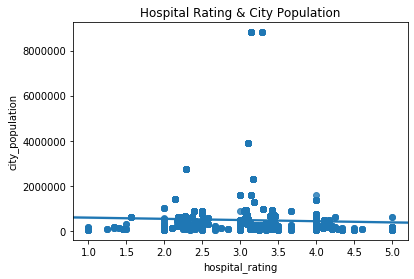

In [191]:
# population scatterplot (scaling)
plt.xlabel('Hospital Rating')
plt.ylabel('City Population')
plt.title("Hospital Rating & City Population")
plt.show(sns.regplot(x='hospital_rating', y='city_population', data = population_df))

In [192]:
## correlation 
corr = population_df["hospital_rating"].corr(population_df["city_population"])
print (round(corr, 2))
print ("not correlated")

-0.04
not correlated
